<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


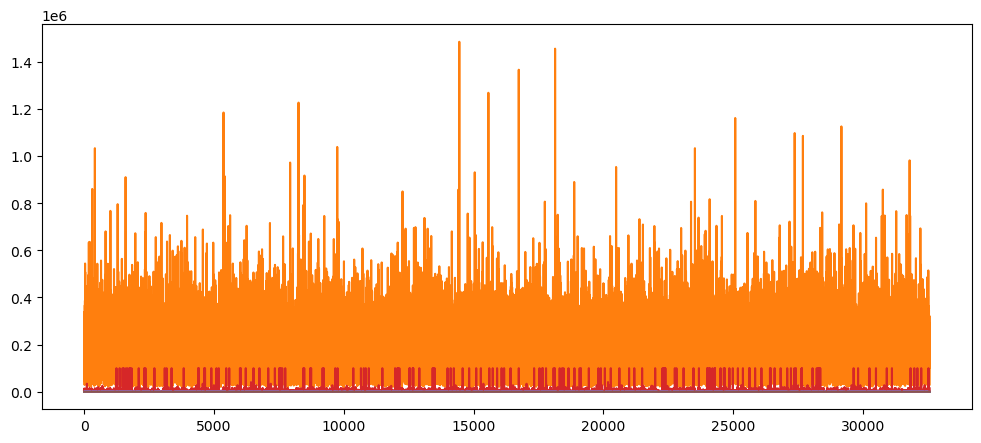

---------------------------------------------------------------------------------------------------------------


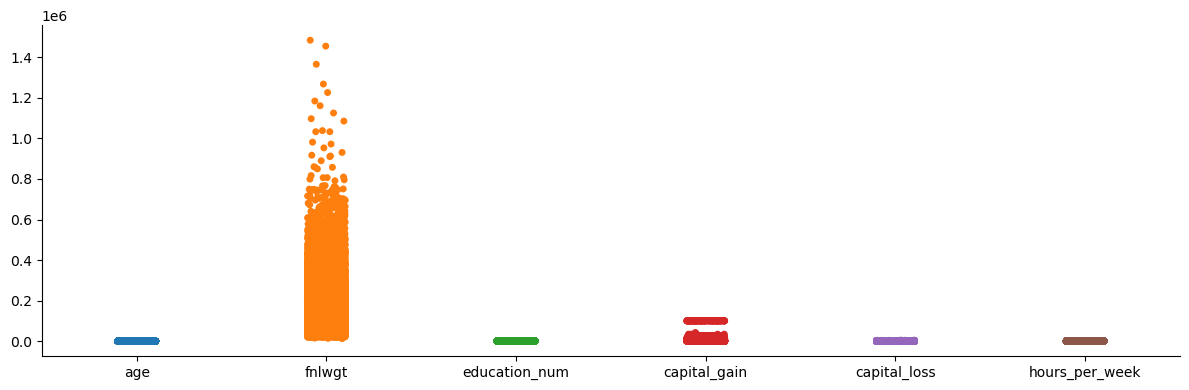

---------------------------------------------------------------------------------------------------------------
Standardized Data
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030390 -1.063569       1.134777      0.148292     -0.216743   
1  0.836973 -1.008668       1.134777     -0.145975     -0.216743   
2 -0.042936  0.245040      -0.420679     -0.145975     -0.216743   
3  1.056950  0.425752      -1.198407     -0.145975     -0.216743   
4 -0.776193  1.408066       1.134777     -0.145975     -0.216743   

   hours_per_week  
0       -0.035664  
1       -2.222483  
2       -0.035664  
3       -0.035664  
4       -0.035664  
---------------------------------------------------------------------------------------------------------------
Normalised Data
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.2876

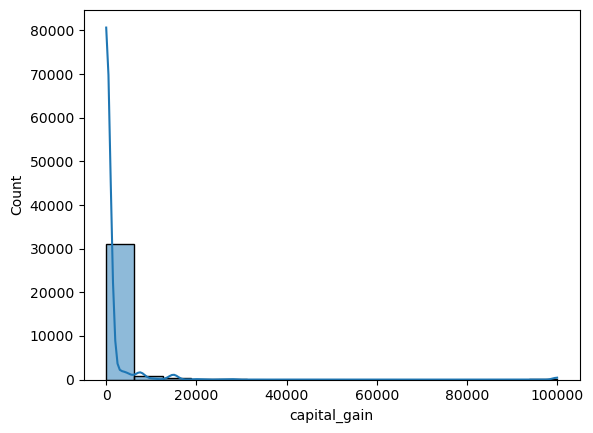

---------------------------------------------------------------------------------------------------------------
       age          workclass  fnlwgt    education  education_num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital_status          occupation    relations

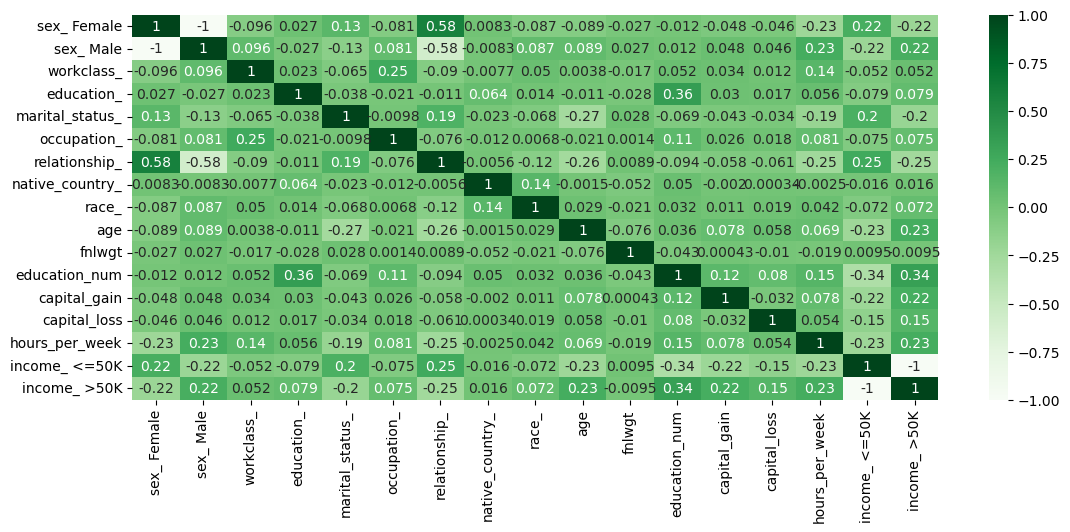

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Data Exploration and PreProcessing
# Loading DataSet
ad_df=pd.read_csv('adult_with_headers.csv')
ad_df.head()
# Inspecting Data
ad_df.info()
ad_df.shape
ad_df.nunique()
ad_df.isnull().sum()
ad_df[ad_df.duplicated(keep='first')]
ad_df.drop_duplicates(inplace=True)
ad_df.shape
# Visualing Numeric columns
plt.figure(figsize=(12,5))
plt.plot(ad_df[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']])
plt.show()
print('-'*111)
# Creating scatter plot
sns.catplot(ad_df[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']],height=4,aspect=3)
plt.show()
print('-'*111)
# Scaleing values for interpretability
from sklearn.preprocessing import MinMaxScaler,StandardScaler
# Using Standardization technique
scale=StandardScaler()
sscaled_arr=scale.fit_transform(ad_df[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']])
sscaled_df=pd.DataFrame(sscaled_arr,columns=['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week'])
print('Standardized Data')
print(sscaled_df.head())
print('-'*111)
# Using Normalization Tecnique
scaler=MinMaxScaler()
nscaled_arr=scaler.fit_transform(ad_df[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']])
nscaled_df=pd.DataFrame(nscaled_arr,columns=['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week'])
print('Normalised Data')
print(nscaled_df.head())
print('-'*111)
# Encoding Techniques
from sklearn.preprocessing import LabelEncoder
# Using Label Encoder
lb_en=LabelEncoder()
workclass_lb=lb_en.fit_transform(ad_df['workclass'])
df_final=pd.DataFrame()
df_final['workclass_']=workclass_lb
df_final['education_']=lb_en.fit_transform(ad_df['education'])
df_final['marital_status_']=lb_en.fit_transform(ad_df['marital_status'])
df_final['occupation_']=lb_en.fit_transform(ad_df['occupation'])
df_final['relationship_']=lb_en.fit_transform(ad_df['relationship'])
df_final['native_country_']=lb_en.fit_transform(ad_df['native_country'])
df_final['race_']=lb_en.fit_transform(ad_df['race'])

from sklearn.preprocessing import OneHotEncoder
# Using one_hot_encoder
enc=OneHotEncoder()
sex_=enc.fit_transform(ad_df[['sex']]).toarray()
sex_df = pd.DataFrame(sex_, columns=enc.get_feature_names_out(['sex']))
inc_=enc.fit_transform(ad_df[['income']]).toarray()
inc_df=pd.DataFrame(inc_, columns=enc.get_feature_names_out(['income']))
print('Income Encoded ')
print(inc_df.head())
print('-'*111)
# Geting together all scaled numeric values and encoded categorical values into a DataFrame
cleaned_df= pd.concat([sex_df,df_final,nscaled_df,inc_df], axis=1)
print('Cleaned Dataset')
print(cleaned_df.head())
print('-'*111)
# Extracting New features and stored in main DataFrame
ad_df['age_group'] = pd.cut( ad_df['age'], bins=[0, 25, 45, 65, 100], labels=[0, 1, 2, 3])
ad_df['work_hours_category'] = pd.cut(ad_df['hours_per_week'], bins=[0, 20, 40, 60, 100], labels=[0, 1, 2, 3])
# Ploting a Histogram for cross checking skewness
sns.histplot(ad_df['capital_gain'],kde=True)
plt.show()
print('-'*111)
# Applying log transformation technique
ad_df['capital_gain']=np.log1p(ad_df['capital_gain'])
print(ad_df)
# segregating all numeric columns
num_features=ad_df.select_dtypes(include=['int64','float64']).columns
from sklearn.ensemble import IsolationForest
# Outliers removing by isolation forest technique
isoforest=IsolationForest(contamination=0.05,random_state=42)
outliers_pred=isoforest.fit_predict(ad_df[num_features])
ad_df=ad_df[outliers_pred==1]
print(ad_df.head())
print('-'*111)
# Evaluating PPS for features coorelations
import ppscore as pps
pps.score(ad_df,'age','income')
print(pps.matrix(cleaned_df[['age', 'fnlwgt', 'education_num', 'capital_gain','capital_loss', 'hours_per_week']]))
print('-'*111)
# Ploting Heatmap for Cleaned_df for compare with PPS 
plt.figure(figsize=(13,5))
sns.heatmap(cleaned_df.corr(),cmap='Greens',annot=True)
plt.show()


#### 
    Min-Max Scaling is preferred for bounded data like image pixel values, percentages and distance-based models k-NN, k-Means, Neural Networks since it maintains relationships but is sensitive to outliers.
    Where as,Standardization (Z-score Scaling) is ideal when data follows a normal distribution and is used in linear regression, PCA, SVMs, as it centers data around zero mean and unit variance.

     OHE:
    Main advantage with OneHotEncoding is it avoids ordinal relationships, works well for nominal data, and is ideal for distance-based models like k-NN and neural networks.And disadvantage with OHE is creates high-dimensional sparse data when dealing with many categories, increasing memory and computation costs.
    Label Encoding:
    Advantages with Label encoding is efficient for high-cardinality features, requires less memory, and works well with tree-based models like Random Forest and XGBoost.Disadvantage is it introduces artificial ordinal relationships, making it unsuitable for nominal categories in linear models or distance-based algorithms.
    Finall, OHE for low-cardinality nominal data in linear models, and LE for high-cardinality or ordinal data in tree-based models.
